Player 1 Wins: 1, Player 2 Wins: 0, Draws: 0


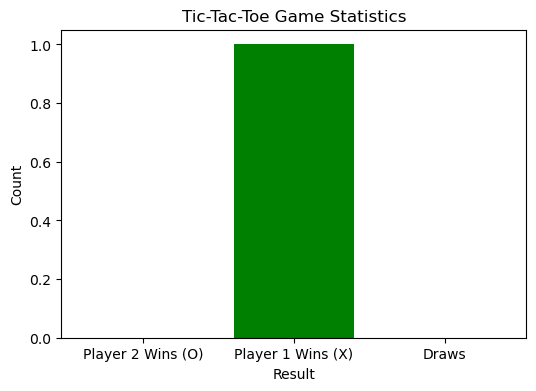

In [ ]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt

# Global statistics to track wins and draws
player1_wins = 0
player2_wins = 0
draws = 0

class TicTacToeGame:
    def __init__(self, root):
        self.root = root
        self.root.title("Tic Tac Toe")
        self.current_player = 'X'  # Player 1 starts with 'X'
        self.board = [' '] * 9  # 3x3 board initialized to empty
        self.buttons = []  # Button widgets
        self.create_board()  # Create the Tic-Tac-Toe board

        # Button to show game statistics
        self.stats_button = tk.Button(self.root, text="Show Stats", command=self.show_stats)
        self.stats_button.grid(row=3, column=0, columnspan=3)

    # Create the 3x3 board as a grid of buttons
    def create_board(self):
        for i in range(9):
            button = tk.Button(self.root, text=" ", font=('normal', 40), width=5, height=2,
                               command=lambda i=i: self.on_button_click(i))
            button.grid(row=i//3, column=i%3)  # Grid placement
            self.buttons.append(button)

    # Handle button click events
    def on_button_click(self, index):
        if self.board[index] == ' ':
            self.board[index] = self.current_player
            self.buttons[index].config(text=self.current_player)
            if self.check_win():
                self.end_game(f"Player {self.current_player} wins!")
                self.update_stats(winner=self.current_player)
            elif self.check_draw():
                self.end_game("It's a draw!")
                self.update_stats(winner=None)
            else:
                self.switch_player()

    # Switch turns between players
    def switch_player(self):
        self.current_player = 'O' if self.current_player == 'X' else 'X'

    # Check for a winner
    def check_win(self):
        win_combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                            (0, 3, 6), (1, 4, 7), (2, 5, 8)]  # columns and diagonals
        for combo in win_combinations:
            if self.board[combo[0]] == self.board[combo[1]] == self.board[combo[2]] != ' ':
                return True
        return False

    # Check for a draw
    def check_draw(self):
        return ' ' not in self.board

    # Handle end of the game and reset the board
    def end_game(self, message):
        messagebox.showinfo("Game Over", message)
        self.reset_board()

    # Reset the board for a new game
    def reset_board(self):
        self.board = [' '] * 9
        for button in self.buttons:
            button.config(text=" ")
        self.current_player = 'X'

    # Update game statistics and show them with Matplotlib
    def update_stats(self, winner):
        global player1_wins, player2_wins, draws
        if winner == 'X':
            player1_wins += 1
        elif winner == 'O':
            player2_wins += 1
        else:
            draws += 1
        print(f"Player 1 Wins: {player1_wins}, Player 2 Wins: {player2_wins}, Draws: {draws}")
    # Show a bar chart of the statistics
    def show_stats(self):
        global player1_wins, player2_wins, draws
        labels = ['Player 2 Wins (O)', 'Player 1 Wins (X)', 'Draws']
        values = [player2_wins, player1_wins, draws]       
        plt.figure(figsize=(6, 4))
        plt.bar(labels, values, color=['blue', 'green', 'red'])
        plt.title("Tic-Tac-Toe Game Statistics")
        plt.xlabel("Result")
        plt.ylabel("Count")
        #plt.show()
        plt.show(block=True)

# Create the main window and run the game
root = tk.Tk()
game = TicTacToeGame(root)
root.mainloop()